In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter.filedialog as tkf
import glob

In [2]:
folder = tkf.askdirectory()
img_adr = glob.glob(folder+"/*")
print(len(img_adr))
img_adr.sort()
#print(img_adr[:30])

11


In [18]:
img_adr = tkf.askopenfilenames()
print(len(img_adr))

162


In [20]:
img_adr[1::2]

('D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0000_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0001_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0002_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0003_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0004_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0005_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0006_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0007_alpha_1.png',
 'D:/python_project/image_processing/STO_ZA_110/CS_result_jitter_95_85_snap_shot/input_001_0008_alpha_1.png',
 'D:/pytho

In [21]:
img_adr = img_adr[1::2]
print(len(img_adr))

81


In [22]:
import skimage.exposure as exposure

images = []
for adr in img_adr:
    temp = plt.imread(adr)[50:-50, 50:-50, 0]
    temp = temp / np.max(temp)
    images.append(temp)
images = np.asarray(images)
print(images.shape)

(81, 100, 100)


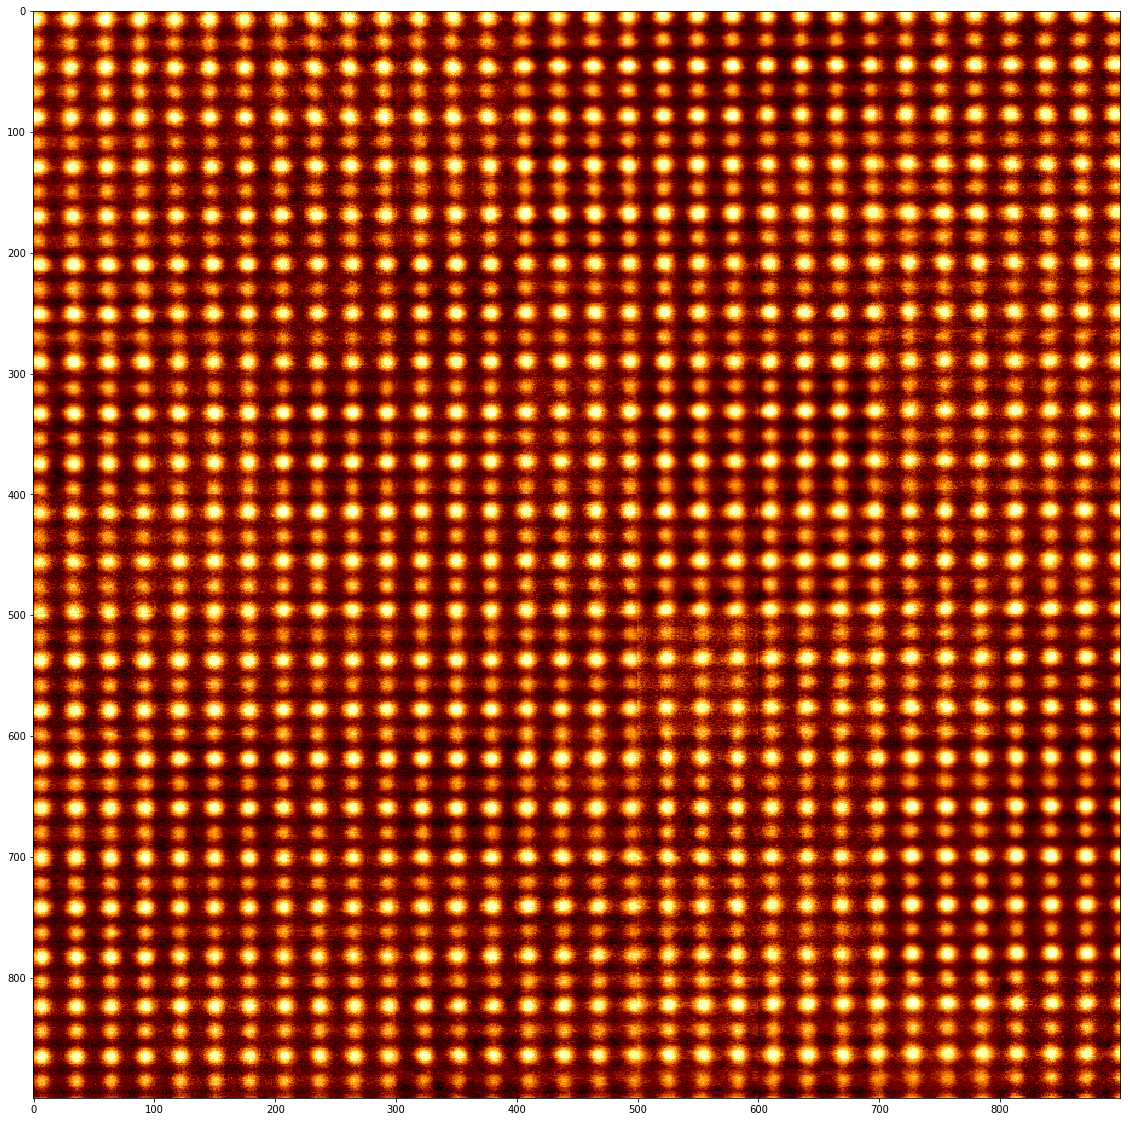

In [13]:
xsize = 9
ysize = 9
crop_size = 100
ny = xsize * crop_size
nx = ysize * crop_size
    
reconstructed = np.zeros((ny, nx))

k = 0
for i in range(ysize):
    for j in range(xsize):
        reconstructed[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size] = images[k]
        k += 1
        
plt.figure(figsize=(20, 20))
plt.imshow(reconstructed, cmap="afmhot")
plt.show()

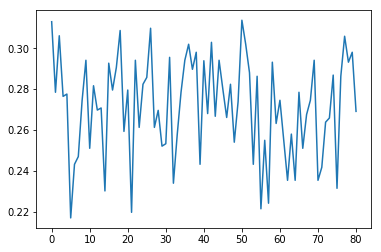

In [14]:
signal_avg = []
for img in images:
    signal_avg.append(np.percentile(img, 50))
signal_avg = np.array(signal_avg)
plt.plot(signal_avg)

(81, 100, 100)


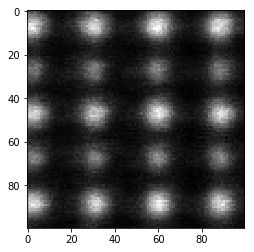

In [15]:
signal_avg_normal = signal_avg / np.max(signal_avg)
adjusted_images = []
for i, img in enumerate(images):
    adjusted_images.append(exposure.adjust_gamma(img, np.exp(0.6*signal_avg_normal[i])))

adjusted_images = np.asarray(adjusted_images)
print(adjusted_images.shape)
    
plt.imshow(adjusted_images[0], cmap="gray")

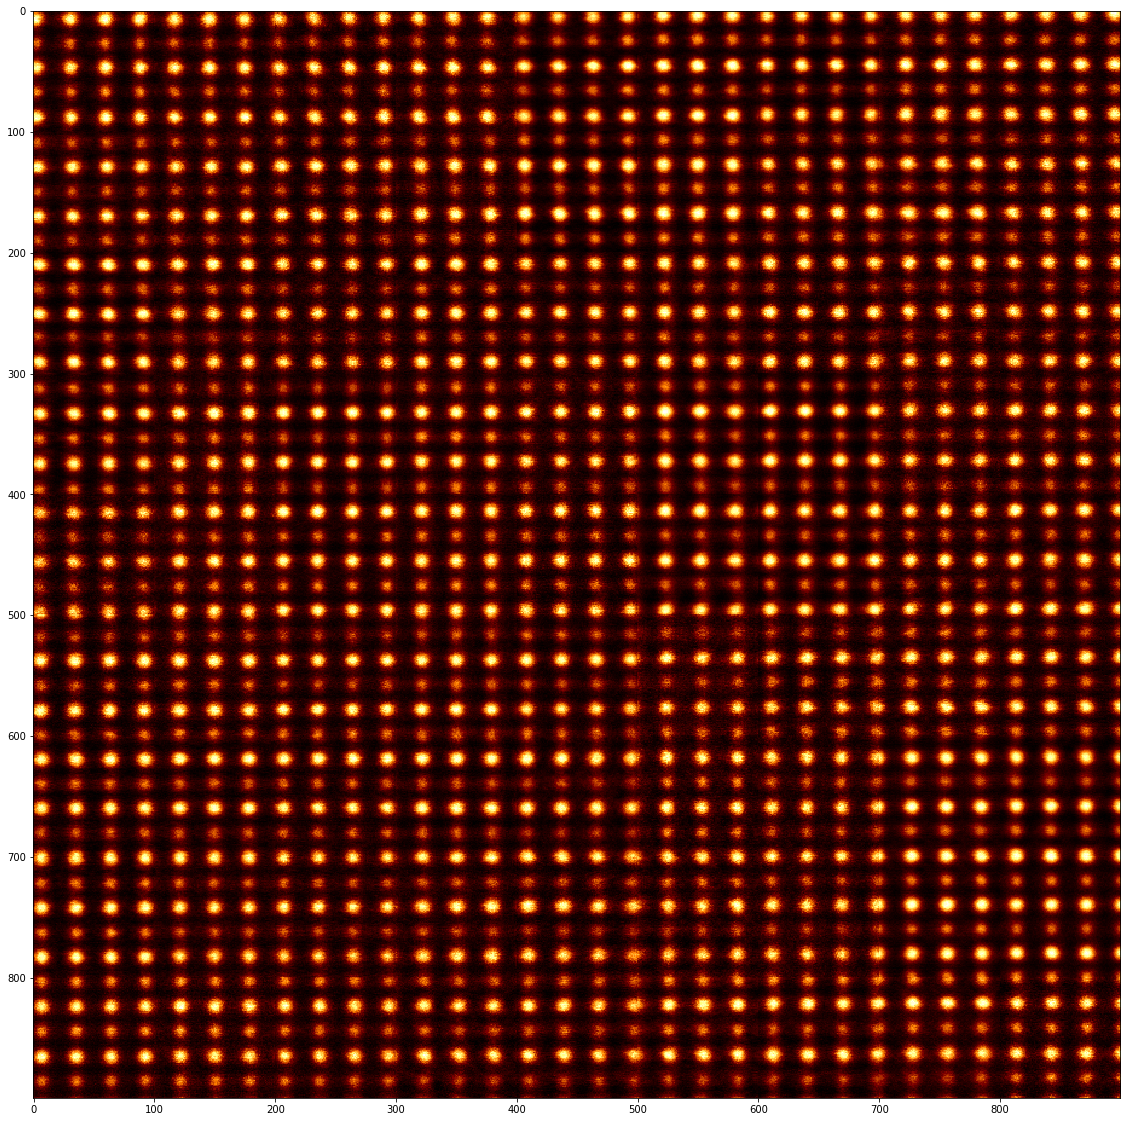

In [16]:
reconstructed_adjusted = np.zeros((ny, nx))

k = 0
for i in range(ysize):
    for j in range(xsize):
        img = plt.imread(img_adr[k])[:, :, 0]
        img = img/np.max(img)
        reconstructed_adjusted[i*crop_size:(i+1)*crop_size, j*crop_size:(j+1)*crop_size] = adjusted_images[k]
        k += 1
        
plt.figure(figsize=(20, 20))
plt.imshow(reconstructed_adjusted, cmap="afmhot")
plt.show()

In [17]:
save_name = tkf.asksaveasfilename()
plt.imsave(fname=save_name, arr=reconstructed, format="png", cmap="gray")

In [23]:
save_name = tkf.asksaveasfilename()
plt.imsave(fname=save_name, arr=reconstructed_adjusted, format="png", cmap="gray")